In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import yfinance as yf

# Daily portfolio value

In [3]:
np.sqrt(252)*((0.001-0.0002)/0.001)

12.699606293110037

In [4]:
data=yf.download("SPY XOM IBM GLD",start="2000-01-01",group_by='ticker')

[*********************100%***********************]  4 of 4 completed


In [5]:
data.head()

SPY                                                        \
             Adj Close     Close       High         Low       Open    Volume   
Date                                                                           
1999-12-31  100.376900  146.8750  147.50000  146.250000  146.84375   3172700   
2000-01-03   99.394493  145.4375  148.25000  143.875000  148.25000   8164300   
2000-01-04   95.507530  139.7500  144.06250  139.640625  143.53125   8089800   
2000-01-05   95.678391  140.0000  141.53125  137.250000  139.93750  12177900   
2000-01-06   94.140717  137.7500  141.50000  137.750000  139.62500   6227200   

                  XOM                                ...  GLD                  \
            Adj Close     Close      High       Low  ... High Low Open Volume   
Date                                                 ...                        
1999-12-31  21.746706  40.28125  40.50000  40.09375  ...  NaN NaN  NaN    NaN   
2000-01-03  21.139345  39.15625  40.37500  38.93750  ...  NaN NaN  NaN    NaN   
2000-01-04  20.734442  38.40625  39.09375  38.25000  ...  NaN NaN  NaN    NaN   
2000-01-05  21.864794  40.50000  40.87500  38.90625  ...  NaN NaN  NaN    NaN   
2000-01-06  22.995153  42.59375  42.90625  40.09375  ...  NaN NaN  NaN    NaN   

                  IBM                                                   
            Adj Close     Close      High      Low      Open    Volume  
Date                                                                    
1999-12-31  69.394135  107.8750  109.5000  106.625  109.1875   2870300  
2000-01-03  74.620827  116.0000  116.0000  111.875  112.4375  10347700  
2000-01-04  72.087906  112.0625  114.5000  110.875  114.0000   8227800  
2000-01-05  74.620827  116.0000  119.7500  112.125  112.9375  12733200  
2000-01-06  73.334274  114.0000  118.9375  113.500  118.0000   7971900  

[5 rows x 24 columns]

In [6]:
data.fillna(method="ffill",inplace=True)
data.fillna(method="bfill",inplace=True)

In [7]:
data.head()

SPY                                                        \
             Adj Close     Close       High         Low       Open    Volume   
Date                                                                           
1999-12-31  100.376900  146.8750  147.50000  146.250000  146.84375   3172700   
2000-01-03   99.394493  145.4375  148.25000  143.875000  148.25000   8164300   
2000-01-04   95.507530  139.7500  144.06250  139.640625  143.53125   8089800   
2000-01-05   95.678391  140.0000  141.53125  137.250000  139.93750  12177900   
2000-01-06   94.140717  137.7500  141.50000  137.750000  139.62500   6227200   

                  XOM                                ...        GLD         \
            Adj Close     Close      High       Low  ...       High    Low   
Date                                                 ...                     
1999-12-31  21.746706  40.28125  40.50000  40.09375  ...  44.490002  44.07   
2000-01-03  21.139345  39.15625  40.37500  38.93750  ...  44.490002  44.07   
2000-01-04  20.734442  38.40625  39.09375  38.25000  ...  44.490002  44.07   
2000-01-05  21.864794  40.50000  40.87500  38.90625  ...  44.490002  44.07   
2000-01-06  22.995153  42.59375  42.90625  40.09375  ...  44.490002  44.07   

                                    IBM                               \
             Open     Volume  Adj Close     Close      High      Low   
Date                                                                   
1999-12-31  44.43  5992000.0  69.394135  107.8750  109.5000  106.625   
2000-01-03  44.43  5992000.0  74.620827  116.0000  116.0000  111.875   
2000-01-04  44.43  5992000.0  72.087906  112.0625  114.5000  110.875   
2000-01-05  44.43  5992000.0  74.620827  116.0000  119.7500  112.125   
2000-01-06  44.43  5992000.0  73.334274  114.0000  118.9375  113.500   

                                
                Open    Volume  
Date                            
1999-12-31  109.1875   2870300  
2000-01-03  112.4375  10347700  
2000-01-04  114.0000   8227800  
2000-01-05  112.9375  12733200  
2000-01-06  118.0000   7971900  

[5 rows x 24 columns]

In [8]:
close_prices={'SPY':data['SPY']['Close'],'XOM':data['XOM']['Close'],'GLD':data['GLD']['Close'],'IBM':data['IBM']['Close']}

In [9]:
df=pd.DataFrame(close_prices)

In [10]:
df.head()

,GLD,IBM,SPY,XOM
Date,,,,
1999-12-31,44.380001,107.8750,146.8750,40.28125
2000-01-03,44.380001,116.0000,145.4375,39.15625
2000-01-04,44.380001,112.0625,139.7500,38.40625
2000-01-05,44.380001,116.0000,140.0000,40.50000
2000-01-06,44.380001,114.0000,137.7500,42.59375


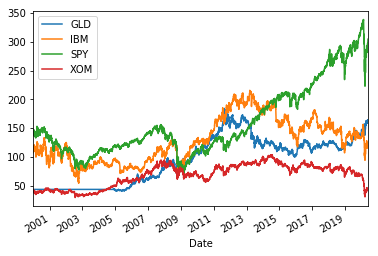

In [11]:
df.plot()

In [12]:
#normalized dataframe
df_norm=df/df.iloc[0,:]

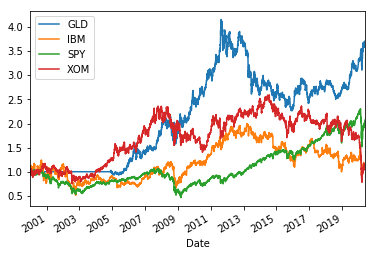

In [13]:
df_norm.plot()

In [14]:
#GLD-0.1 IBM-0.1 SPY-0.4 XOM-0.4
allocation=[0.1, 0.1, 0.4, 0.4]

In [15]:
df_alloc=df_norm*allocation

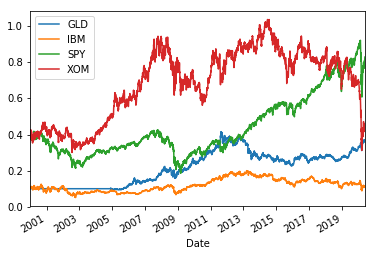

In [16]:
df_alloc.plot()

In [17]:
#Initial investment
df_inv=df_alloc*1000000

In [18]:
df_ret=df_inv/df_inv.shift(1)-1

In [19]:
df_ret=df_ret[1:]

In [20]:
df_ret.head()

,GLD,IBM,SPY,XOM
Date,,,,
2000-01-03,0.0,0.075319,-0.009787,-0.027929
2000-01-04,0.0,-0.033944,-0.039106,-0.019154
2000-01-05,0.0,0.035137,0.001789,0.054516
2000-01-06,0.0,-0.017241,-0.016071,0.051698
2000-01-07,0.0,-0.004386,0.058076,-0.002935


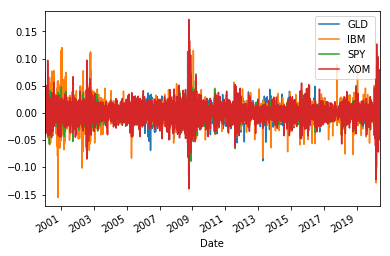

In [21]:
df_ret.plot()

In [22]:
#assuming risk free return 0
sharpe_ratio=df_ret.mean()/df_ret.std()*np.sqrt(252)

In [23]:
sharpe_ratio

GLD    0.480462
IBM    0.159766
SPY    0.278978
XOM    0.150362
dtype: float64

# nifty data

In [24]:
nifty_df=yf.download("^NSEI",start="2000-01-01")

[*********************100%***********************]  1 of 1 completed


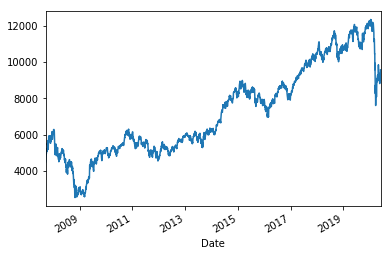

In [27]:
nifty_df['Close'].plot()

In [28]:
#compute logarithmic returns using nifty close price
log_ret=np.log(nifty_df['Close']/nifty_df['Close'].shift(1))

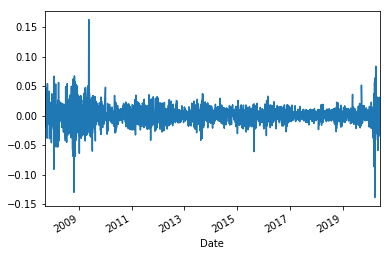

In [29]:
log_ret.plot()

In [30]:
#compute volatility using pandas rolling std dev function
nifty_df['volatility']=log_ret.rolling(window=252).std()*np.sqrt(252)

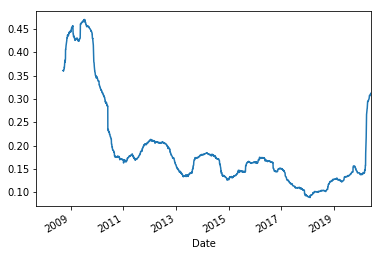

In [31]:
nifty_df['volatility'].plot()

# sharpe ratio

In [33]:
def sharpe_ratio(returns,rf,days=252):
    """
    rf-risk free return
    sampling per day :days 252
    sampling per week: weeks 52
    sampling per month: months 12
    """
    volatility=returns.std()*np.sqrt(days)
    sharpe_ratio=(returns.mean()-rf)/volatility
    return sharpe_ratio
    

# Information ratio

It measures a trader’s ability to generate excess returns relative to a benchmark.

In [34]:
def info_ratio(returns,benchmark_returns,days=252):
    """
    benchmark return
    
    """
    return_diff=returns-benchmark_returns
    volatility=return_diff.std()*np.sqrt(days)
    information_ratio=return_diff.mean()/volatility
    return information_ratio

# Modigliani ratio (M2 ratio)

The Modigliani ratio measures the returns of the portfolio, adjusted for the risk of the portfolio relative to that of some benchmark.

To calculate the M2 ratio, we first calculate the Sharpe ratio and then multiply it by the annualized standard deviation of a chosen benchmark. We then add the risk-free rate to the derived value to give M2 ratio.

In [35]:
def modigilani_ratio(returns,benchmark_returns,rf,days=252):
    volatility=returns.std()*np.sqrt(days)
    sharpe_ratio=(returns.mean()-rf)/volatility
    benchmark_volatility=benchmark_returns.std()*np.sqrt(days)
    m2_ratio=(sharpe_ratio*benchmark_volatility)+rf
    return modigilani_ratio